In [1]:
# Python Collection
from collections import Counter

# FOR Loop Verbose
from tqdm import tqdm

# System
import os

# String
import string

# Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

# Date and Time
import datetime

# Dataframe
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Numerical Data
import numpy as n

In [2]:
%matplotlib inline

In [4]:
df = pd.read_csv('human_eval.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              100 non-null    int64 
 1   ID                      100 non-null    object
 2   Text                    100 non-null    object
 3   Upvotes                 100 non-null    int64 
 4   Depth                   100 non-null    int64 
 5   Created Timestamp(UTC)  100 non-null    object
 6   Replies                 100 non-null    int64 
 7   Author                  96 non-null     object
 8   Post ID                 100 non-null    object
 9   Parrant Comment ID      100 non-null    object
 10  Text Length             100 non-null    int64 
 11  Edited                  100 non-null    bool  
 12  Is Submitter            100 non-null    bool  
 13  Subreddit Name          100 non-null    object
 14  Student_1 (Rakesh)      100 non-null    object
 15  Student

In [6]:
# Select the label columns
label_columns = ['Human Majority Label', 'Model Majority Label']

# Calculate the mode (majority label) for each label column
majority_labels = df[label_columns].mode().iloc[0]

print("Majority Labels:")
print(majority_labels)

Majority Labels:
Human Majority Label    Neutral
Model Majority Label    neutral
Name: 0, dtype: object


# Levels of agreement among the models' label assignments

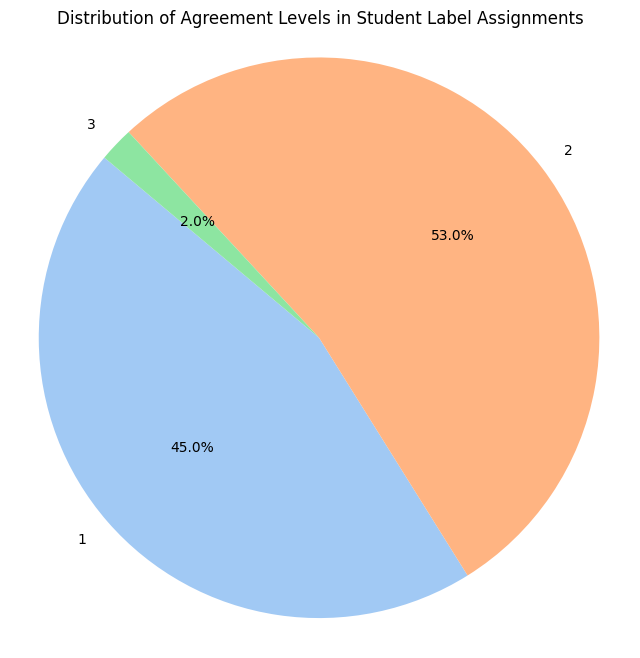

In [14]:
# Select the columns containing student labels
student_label_columns = ['Student_1 (Rakesh)', 'Student_2 (Aamod)', 'Student_3 (Dhruv)']

# Filter the DataFrame to include only rows where all labels are available
filtered_df = df.dropna(subset=student_label_columns, how='all')

# Create a new DataFrame to store the label comparison data
comparison_data = filtered_df[student_label_columns]

# Calculate the frequency of label combinations
label_combination_counts = comparison_data.apply(lambda row: tuple(row), axis=1).value_counts()

# Count the occurrences of different levels of agreement
agreement_counts = {}
for label_combination, count in label_combination_counts.items():
    agreement_level = len(set(label_combination))
    if agreement_level not in agreement_counts:
        agreement_counts[agreement_level] = count
    else:
        agreement_counts[agreement_level] += count

# Create a DataFrame for plotting
agreement_df = pd.DataFrame(agreement_counts.items(), columns=['Agreement Level', 'Frequency'])

# Create a pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:len(agreement_df)]
plt.pie(agreement_df['Frequency'], labels=agreement_df['Agreement Level'], colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Agreement Levels in Student Label Assignments')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()

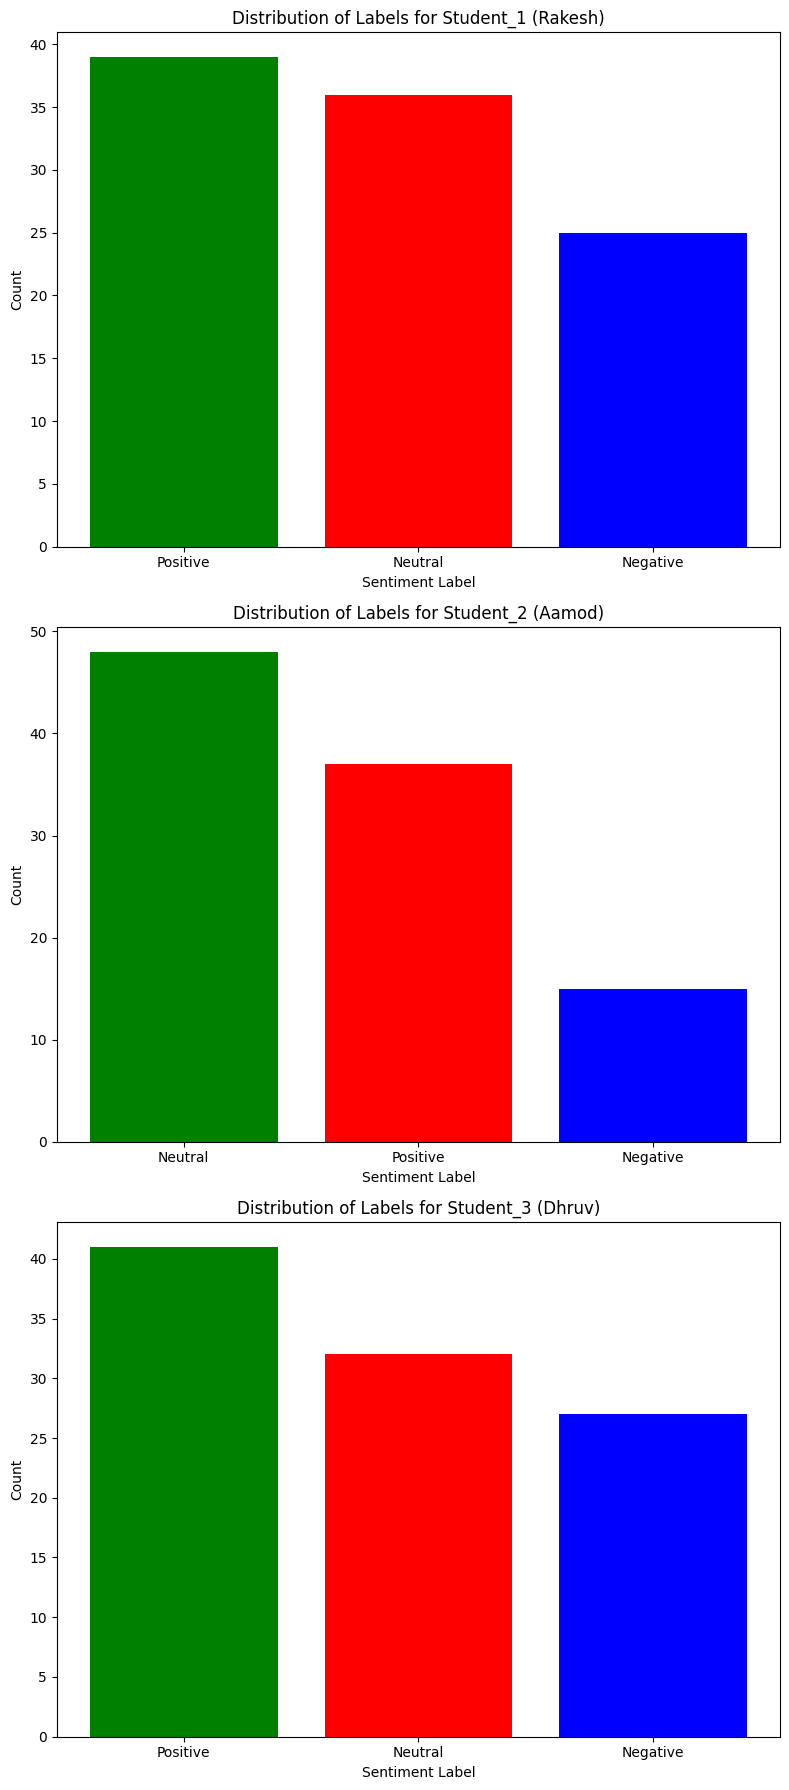

In [17]:
import matplotlib.pyplot as plt

# Columns for analysis
student_columns = ['Student_1 (Rakesh)', 'Student_2 (Aamod)', 'Student_3 (Dhruv)']

# Create a DataFrame to store label counts for each student
label_counts = {}
for student_col in student_columns:
    counts = df[student_col].value_counts()
    label_counts[student_col] = counts

# Set up subplots
fig, axes = plt.subplots(nrows=len(student_columns), ncols=1, figsize=(8, 6 * len(student_columns)))
fig.tight_layout(pad=5.0)

# Iterate through student columns and create bar plots
for idx, student_col in enumerate(student_columns):
    counts = label_counts[student_col]
    labels = counts.index
    values = counts.values

    # Create a bar plot
    ax = axes[idx]
    ax.bar(labels, values, color=['green', 'red', 'blue'])
    ax.set_title(f'Distribution of Labels for {student_col}')
    ax.set_xlabel('Sentiment Label')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()